In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Let's take a look at the data...

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/jvanlier/ML_DL_Intro_Course/master/Day1Notebooks/data/winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
1,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
2,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
3,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
4,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3


Ok, we want to classify the quality, but it's a numeric value.
Let's take a look at the distribution.

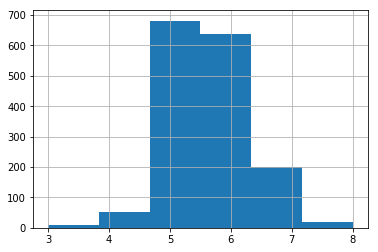

In [5]:
df["quality"].hist(bins=df["quality"].nunique())

Ok, let's call wines with quality 6, 7 or 8 "good". The rest is "not good".

In [6]:
df["isGood"] = 0
df.loc[df["quality"] >= 6, "isGood"] = 1

In [7]:
df["isGood"].value_counts()

1    855
0    744
Name: isGood, dtype: int64

Good, the distribution of 0s and 1s is pretty balanced. This should make it easier to classify and evaluate.

In [8]:
df = df.drop("quality", axis=1)

Ok, we've now binarized the target variable.

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,isGood
0,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,0
1,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,0
2,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,0
3,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,0
4,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,0


### A first model

Let's go with Logistic Regression.

Take a look at the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and try to import it.


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
X = df.drop("isGood", axis=1)  # Make sure that the target is not also part of the features!
y = df["isGood"]

Try to train the classifier below (on the entire data set):

Hint: take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit).

In [13]:
model.fit(X, y)

/Users/jvlier/pyvenvs/deepturn_v6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Now, try to get a score below.

Again, you might want to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score).

In [14]:
model.score(X, y)

0.7435897435897436

What do you think about this score? Good? Bad?

**Answer: it is hard to say if this is good or bad without placing it in context. We would have to compare this to a simple baseline.**

Before you move on, try and see what happens if we're *not* dropping "isGood" from the dataset before fitting. What is the effect on the score?

**Answer: this results in a perfect score of 1.0 - perfect predictions. Whenever you see a too-good-to-be-true result, be skeptical. We're leaking data of the target into the input features.**

Restore the drop before moving on.

To evaluate whether the score is good, it's always wise to compare it to a simple baseline.

Let's take a look the number of 0's and the number of 1's again:

In [15]:
df["isGood"].value_counts()

1    855
0    744
Name: isGood, dtype: int64

What would the accuracy be if we always predict the majority class: 1?

In [16]:
855 / (855 + 744)

0.5347091932457786

So, how do you feel about the model's accuracy?

**Answer: Pretty good now! The model is doing something to improve our odds of selecting a good wine.**

## Let's see some examples

In [17]:
random_example = X.sample(n=1)
print("True 'isGood' value: {}".format(df.loc[random_example.index, "isGood"].values[0]))
random_example

True 'isGood' value: 1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1322,6.4,0.69,0.0,1.65,0.055,7.0,12.0,0.99162,3.47,0.53,12.9


Now [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) whether this wine is any good!

In [18]:
model.predict(random_example)

array([1])

You might wonder why it's only showing 0 and 1. Logistic Regression can do probabilities, right?

Well, there is another function that returns probabilities. See if you can find it in the documentation.

In [19]:
model.predict_proba(random_example)

array([[0.10883927, 0.89116073]])

Try to run this again for some other random samples.

### Inspecting the model

We can take a look at the coefficients $\theta$ of the model. Again, refer to the documentation to find out how they can be accessed. Assign them here:

In [20]:
coef = model.coef_

In [21]:
coef_map = dict(zip(df.columns.values, coef[0]))
coef_map

{'fixed acidity': -0.004505050712699312,
 'volatile acidity': -2.895140129120526,
 'citric acid': -0.7663786376703309,
 'residual sugar': 0.024346547278809718,
 'chlorides': -1.633902147001544,
 'free sulfur dioxide': 0.02542243030060732,
 'total sulfur dioxide': -0.018098009867324842,
 'density': -1.398149475056191,
 'pH': -1.5576297517601594,
 'sulphates': 1.9476812904619556,
 'alcohol': 0.8826666780892456}

Some of these stand out. Let's inspect some of them:

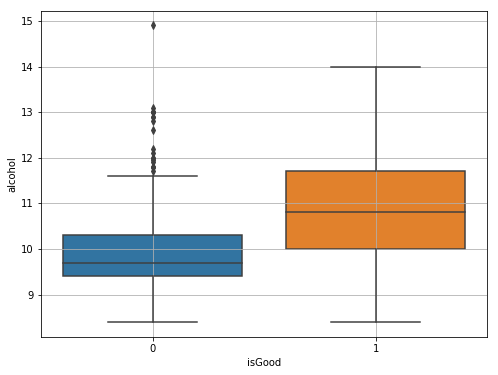

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="isGood", y="alcohol", data=df)
plt.grid()

Any interesting findings?

**Answer: I, for one, never knew that a high alcohol content is associated with a good wine!**

### Our methodology was a bit flawed here...

If we use the full dataset for training, and then report the score on the same data set as we used for training, the score is usually a bit *too* positive. 

Below is an import for a new function that will help us make a train and testing split. Could you see if you can get it to work? [Docs are here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

You should now have 4 new variables: `X_train`, `X_test`, `y_train`, `y_test`.

These variables are `numpy` arrays instead of `pandas` DataFrames. They are a bit harder to use/inspect (there is no pretty formatting like we get when we run `.head()` on a DataFrame). Try accessing the `.shape` attribute to inspect their dimensions.

In [31]:
X_train.shape

(1199, 11)

In [32]:
X_test.shape

(400, 11)

### Open-ended bonus asignments

- Re-train the model, but now only on X_train and y_train. 
- Evaluate on both X_train & y_train and X_test & y_test. Do you notice a difference?
- Increase the complexity: add polynomial features (manually or using [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)). What does this do to the scores on train & test?
- You might be able to get the train and test scores closer together by tuning the "C" parameter. Give that a go.
- What is your best score?

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Training set score {:0.3f}".format(lr.score(X_train, y_train)))
print("Test     set score {:0.3f}".format(lr.score(X_test, y_test)))

Training set score 0.749
Test     set score 0.743


/Users/jvlier/pyvenvs/deepturn_v6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train score seems a bit higher than test score... note that this does not always have to be the case, because the data set get split randomly!

In [35]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
print(X.shape)
print(X_poly.shape)

(1599, 11)
(1599, 364)


In [38]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y)

In [39]:
# I'm using the 'C' hyperparameter below to increase regularization - 
# this is an advanced technique which we will learn about later today!
lr = LogisticRegression(C=2)
lr.fit(X_poly_train, y_poly_train)
print("Training set score {:0.3f}".format(lr.score(X_poly_train, y_poly_train)))
print("Test     set score {:0.3f}".format(lr.score(X_poly_test, y_poly_test)))

/Users/jvlier/pyvenvs/deepturn_v6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training set score 0.772
Test     set score 0.770


/Users/jvlier/pyvenvs/deepturn_v6/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


With Polynomial features, both train and test scores improve. This suggests that there are some interactions between features that may be exploited!

My best test score seems to be .770! Although this might just be due to luck with how the train/test split ended up (results are slightly different for each train/test split). Later today, we'll learn a more advanced technique called k-fold crossvalidation, which produces a more robust score.